# Task-6


## Name:Vibhav Surve

## Aim:Create the Decision Tree classifier and visualize it graphically.

## Import required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Importint necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import gradio as gr
sns.set_style("darkgrid")

## Exploring data

In [2]:
iris_data=pd.read_csv("Iris.csv")

In [3]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_data.shape

(150, 6)

In [5]:
iris_data.drop("Id",axis=1,inplace=True)

In [6]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

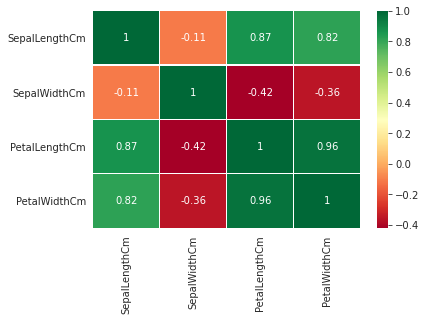

In [7]:
corrmat=iris_data.corr()
sns.heatmap(corrmat, cmap ='RdYlGn', linewidths = 0.30, annot = True)

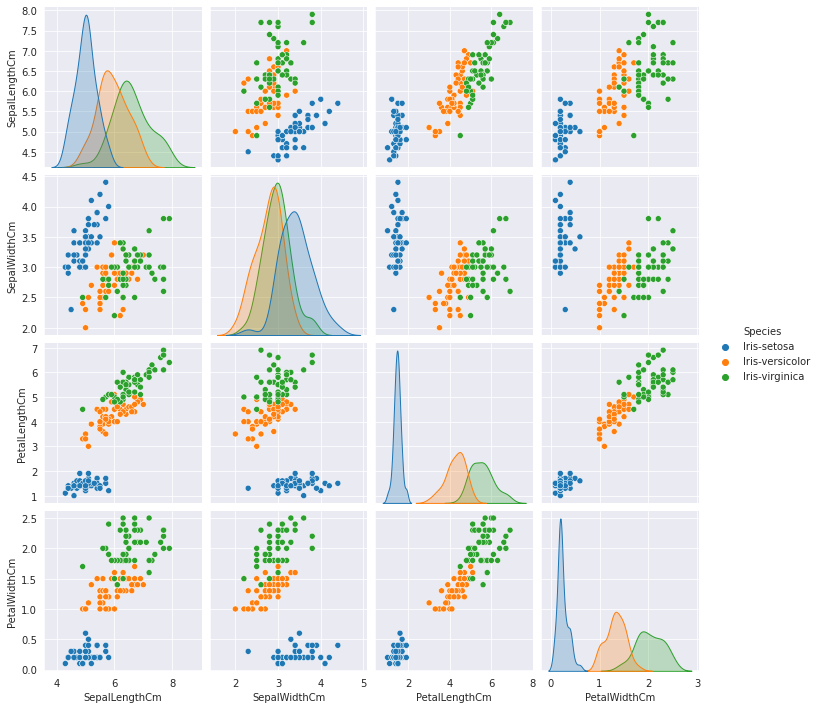

In [8]:
sns.pairplot(iris_data,hue="Species")

In [9]:
x=iris_data.drop("Species",axis=1)
y=iris_data["Species"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## DecisionTreeClassifier

In [11]:
tree=DecisionTreeClassifier()#decision tree with default depths

In [12]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred=tree.predict(x_test)

In [14]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [15]:
treeR=DecisionTreeClassifier(max_depth=2)#decision tree with 2 depths

In [16]:
treeR.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [17]:
y_=treeR.predict(x_test)

In [18]:
metrics.accuracy_score(y_test,y_)

1.0

## DecisionTree with 2 depths

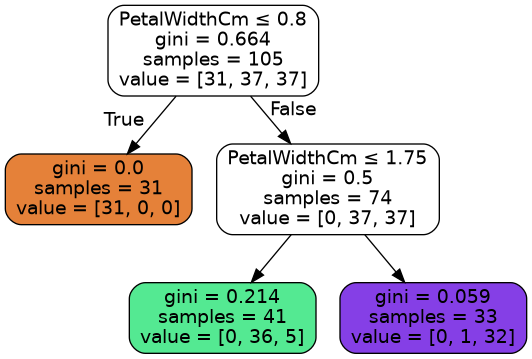

In [19]:
features=[feature for feature in iris_data.columns if iris_data[feature].dtypes!="O"]
#features=features[:,:]
#print(features)
# Visualize the graph
dot_data = StringIO()
export_graphviz(treeR, out_file=dot_data, feature_names=features,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [20]:
score=metrics.confusion_matrix(y_test,y_)

In [21]:
score

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [22]:
class_report=metrics.classification_report(y_test,y_)
print(class_report)#report with default depth 2 of tree

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



## DecisionTree with default depths

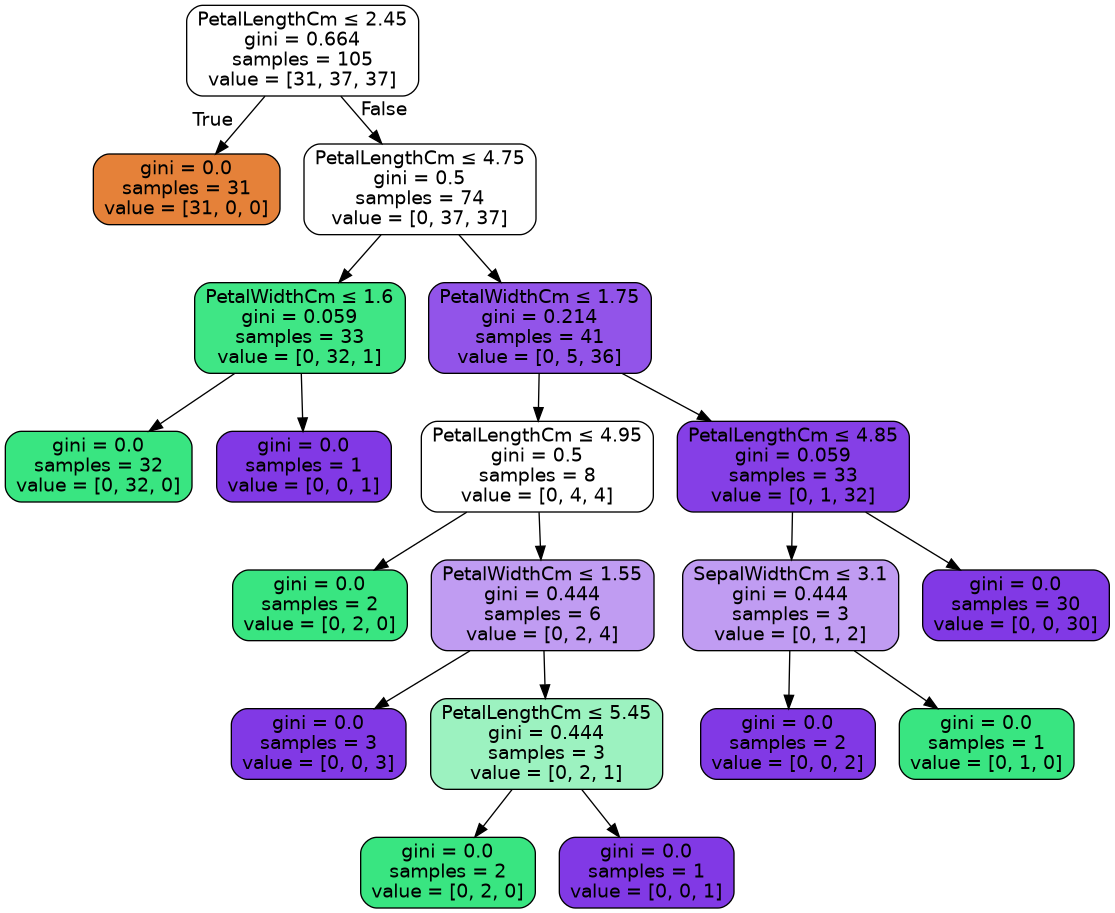

In [23]:
features=[feature for feature in iris_data.columns if iris_data[feature].dtypes!="O"]
#features=features[:,:]
#print(features)
# Visualize the graph
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=features,  
                filled=True, rounded=True,
                special_characters=True)
graph1 = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph1.create_png())

In [24]:
score=metrics.confusion_matrix(y_test,y_pred)
score

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [25]:
class_report=metrics.classification_report(y_test,y_pred)
print(class_report)#report with default depth tree

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [26]:
def predictSpecies(Sepal_Length,Sepal_Width,Petal_Length,Petal_Width):
    return tree.predict([[Sepal_Length,Sepal_Width,Petal_Length,Petal_Width]])

# Predicting Using Gradio

In [27]:
iface = gr.Interface(
    fn=predictSpecies,
    inputs=[gr.inputs.Slider(0.0, 8.0),gr.inputs.Slider(0.0, 4.5),gr.inputs.Slider(0.0, 7.0),gr.inputs.Slider(0.0, 2.5)],
    outputs="text"    
)
iface.launch(share=True)

Running locally at: http://127.0.0.1:7860/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://40245.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://40245.gradio.app')